In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#leer los datos obtenidos de TrueFX
datos = pd.read_csv("../data/TrueFX/EUR-USD/EURUSD-2018-01.csv",float_precision='high',parse_dates=True
                    ,names =list(['ref','bid', 'ask']),infer_datetime_format=True,index_col=1)
datos.shape

(3952896, 3)

In [3]:
datos = datos.drop('ref',axis=1)
datos.head()

,bid,ask
2018-01-01 22:01:01.051,1.20094,1.20116
2018-01-01 22:01:01.158,1.20093,1.20115
2018-01-01 22:01:11.676,1.20093,1.20111
2018-01-01 22:01:18.116,1.20082,1.20111
2018-01-01 22:01:32.023,1.20043,1.20070


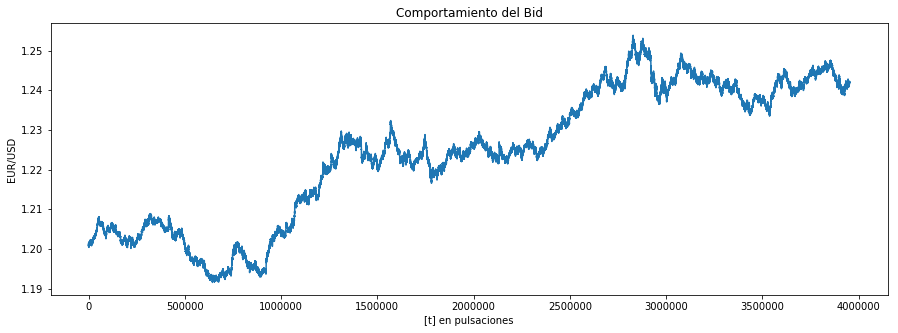

In [4]:
plt.figure(figsize=(15,5))
plt.title('Comportamiento del Bid')
plt.xlabel('[t] en pulsaciones')
plt.ylabel('EUR/USD')
plt.plot(range(datos.shape[0]),datos.iloc[:,1]);

In [5]:
#se agrupan los indices según su fecha, como hay fechas repetidas de toma la que primero está
datos = datos.groupby(datos.index).first()
datos.shape

(3949821, 2)

In [6]:
np.unique(datos.index.date)

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 2),
       datetime.date(2018, 1, 3), datetime.date(2018, 1, 4),
       datetime.date(2018, 1, 5), datetime.date(2018, 1, 7),
       datetime.date(2018, 1, 8), datetime.date(2018, 1, 9),
       datetime.date(2018, 1, 10), datetime.date(2018, 1, 11),
       datetime.date(2018, 1, 12), datetime.date(2018, 1, 14),
       datetime.date(2018, 1, 15), datetime.date(2018, 1, 16),
       datetime.date(2018, 1, 17), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 19), datetime.date(2018, 1, 21),
       datetime.date(2018, 1, 22), datetime.date(2018, 1, 23),
       datetime.date(2018, 1, 24), datetime.date(2018, 1, 25),
       datetime.date(2018, 1, 26), datetime.date(2018, 1, 28),
       datetime.date(2018, 1, 29), datetime.date(2018, 1, 30),
       datetime.date(2018, 1, 31)], dtype=object)

In [7]:
datos['2018-1-14']

,bid,ask
2018-01-14 22:03:06.005,1.21954,1.22016
2018-01-14 22:03:33.715,1.21952,1.22016
2018-01-14 22:03:39.952,1.21976,1.22029
2018-01-14 22:03:42.013,1.21976,1.22017
2018-01-14 22:03:53.567,1.21987,1.22017
2018-01-14 22:03:53.570,1.21987,1.22012
2018-01-14 22:03:55.789,1.21987,1.21996
2018-01-14 22:03:55.840,1.21987,1.22012
2018-01-14 22:03:56.222,1.21987,1.21988
2018-01-14 22:03:56.224,1.21975,1.21988


In [6]:
pd.Timedelta(hours=23,minutes=59,seconds=51) - pd.Timedelta(hours=23,minutes=58,seconds=28)

Timedelta('0 days 00:01:23')

In [6]:
#para correr los dias, quedan 5 bussines day
datos.index = datos.index + pd.Timedelta(hours=1, minutes=56, seconds=54)

In [10]:
np.unique(datos.index.date)

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 2),
       datetime.date(2018, 1, 3), datetime.date(2018, 1, 4),
       datetime.date(2018, 1, 5), datetime.date(2018, 1, 8),
       datetime.date(2018, 1, 9), datetime.date(2018, 1, 10),
       datetime.date(2018, 1, 11), datetime.date(2018, 1, 12),
       datetime.date(2018, 1, 15), datetime.date(2018, 1, 16),
       datetime.date(2018, 1, 17), datetime.date(2018, 1, 18),
       datetime.date(2018, 1, 19), datetime.date(2018, 1, 22),
       datetime.date(2018, 1, 23), datetime.date(2018, 1, 24),
       datetime.date(2018, 1, 25), datetime.date(2018, 1, 26),
       datetime.date(2018, 1, 29), datetime.date(2018, 1, 30),
       datetime.date(2018, 1, 31), datetime.date(2018, 2, 1)], dtype=object)

In [8]:
datos.head()

,bid,ask
2018-01-01 23:57:55.051,1.20094,1.20116
2018-01-01 23:57:55.158,1.20093,1.20115
2018-01-01 23:58:05.676,1.20093,1.20111
2018-01-01 23:58:12.116,1.20082,1.20111
2018-01-01 23:58:26.023,1.20043,1.20070


In [7]:
#se muestrean en intervalos de 10s
datos = datos.resample('10T', loffset='10T').last().dropna() #se coge el último valor de muestreo de los 10s
print(datos.shape)
datos.head()

(3181, 2)


,bid,ask
2018-01-02 00:00:00,1.20015,1.20110
2018-01-02 00:10:00,1.20082,1.20126
2018-01-02 00:20:00,1.20049,1.20085
2018-01-02 00:30:00,1.20079,1.20113
2018-01-02 00:40:00,1.20143,1.20158


In [8]:
#guardar el data set pre-procesado
datos.to_csv('../data/TrueFX/EUR-USD/datos_procesados_10T_EURUSD-2018-01.csv')

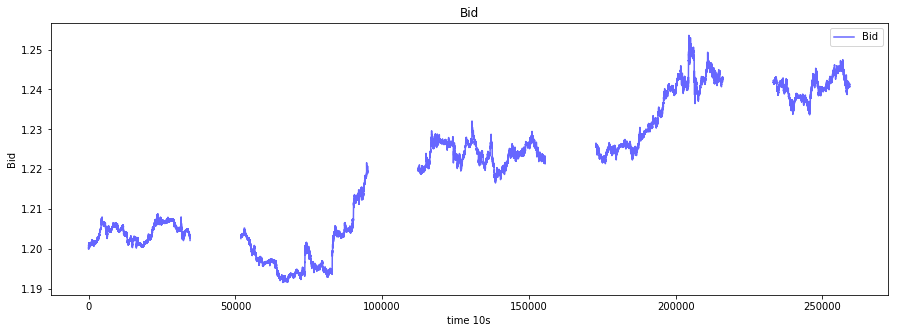

In [16]:
plt.figure(figsize=(15,5))
plt.title('Bid')
plt.xlabel('time 10s')
plt.ylabel('Bid')
plt.plot(np.arange(datos.shape[0]), datos.iloc[:,0],color='blue',alpha=0.6, label='Bid')
plt.legend();

In [17]:
print('datos nan')
print('------------')
print(np.sum(pd.isnull(datos)*1))

datos nan
------------
bid    75677
ask    75677
dtype: int64


In [18]:
datos = datos.dropna() #se eliminan los nan
print(datos.shape)

(183535, 2)


In [19]:
#guardar el data set pre-procesado
datos.to_csv('../data/TrueFX/EUR-USD/datos_procesados_EURUSD-2018-01.csv')

In [ ]:
k = datos.groupby(datos.index).count()
print (k.shape)
k.bid.value_counts().
